# ANALYSE DES FEATURES IMPORTANCES DANS NOS MODELES

Cette analyse peut venir completer l'analyse des corelations pour identifier les features necessaires et suffisantes lors de notre Feature Engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def transform_X(X, loaded_model):
    """Applique les transformation qui precede l'estimator dans le Pipeline. Permet d'obtenir une version des donnees telle que l'estimator traitera"""
    imputer = loaded_model['imputer']
    scaler = loaded_model['scaler']
    X_imp = imputer.transform(X)
    X_sc = scaler.transform(X_imp)
    new_X=pd.DataFrame(X_sc, columns=X.columns.tolist())
    return  new_X

# Chargement du model

Recuperation du chemin du model dans MLFlow :

In [3]:
filename = './mlruns/0/188275be980b4b8c82916f2352755dae/artifacts/XGBoost/model.pkl'

In [4]:
from sklearn import model_selection
import pickle
# CUSTOM
import mbr_kernel as mkn

TEST_SIZE = 0.2
RANDOM_STATE = 42

In [5]:
df_train = pd.read_csv('./input_data/application_train.csv')
df = mkn.full_feature_engineering(df_input=df_train, df_folder='./input_data/',encoding_treshold=0.04, nan_treshold=0.4)
X = df.drop(columns = ['SK_ID_CURR', 'TARGET'])
y = df['TARGET']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)
print(f"X_train : {X_train.shape} // X_test : {X_test.shape}")
print(f"y_train : {y_train.shape} // y_test : {y_test.shape}")

Forme initiale du Dataframe :  (307511, 122)


/home/maximorose/git_repositories/cln_oc_p07/outils_feature_engineering_810.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df.drop(columns=['taux_nan'], inplace=True)
/home/maximorose/git_repositories/cln_oc_p07/mbr_kernel.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
/home/maximorose/git_repositories/cln_oc_p07/mbr_kernel.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

Forme du Dataframe apres traitement :  (219656, 122)

Application dataframe shape:  (219656, 17)
application processing - done in 1s
Forme initiale du Dataframe :  (1716428, 17)
Forme du Dataframe apres traitement :  (1716428, 17)
Bureau dataframe shape:  (305811, 8)
Bureau and bureau_balance processing - done in 7s
Forme initiale du Dataframe :  (1670214, 37)


/home/maximorose/git_repositories/cln_oc_p07/outils_feature_engineering_810.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_df.drop(columns=['taux_nan'], inplace=True)


Forme du Dataframe apres traitement :  (1234578, 37)
Forme initiale du Dataframe :  (13605401, 8)
Forme du Dataframe apres traitement :  (13605401, 8)
Previous Application dataframe shape:  (338308, 12)
Previous application processing - done in 25s
Pos-Cash dataframe shape:  (337252, 3)
Pos-Cash processing - done in 5s
Installement dataframe shape:  (339587, 7)
Installment processing - done in 13s
CC dataframe shape:  (103558, 6)
CC processing - done in 6s
X_train : (175724, 51) // X_test : (43932, 51)
y_train : (175724,) // y_test : (43932,)


In [6]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print("AUC : ", result)

AUC :  0.7219111353910589


# FEATURE IMPORTANCE ANALYSIS

In [7]:
xgb_estim = loaded_model['estimator']

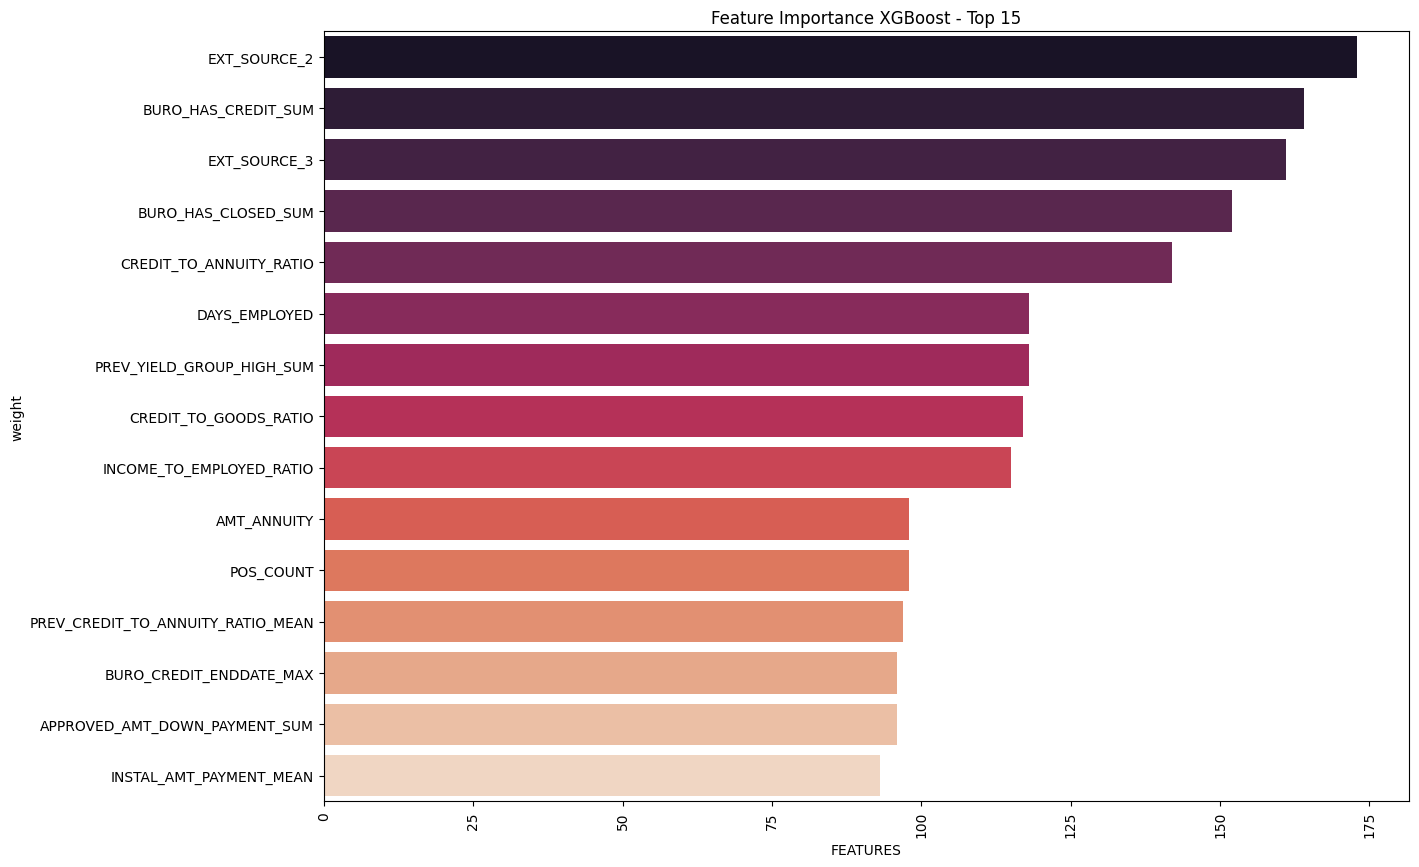

In [8]:
from outils_classification_810 import feature_importance_XGBoost

feat_imps = feature_importance_XGBoost(xgb_estimator=xgb_estim, feature_names=X_train.columns, importance_type='weight')

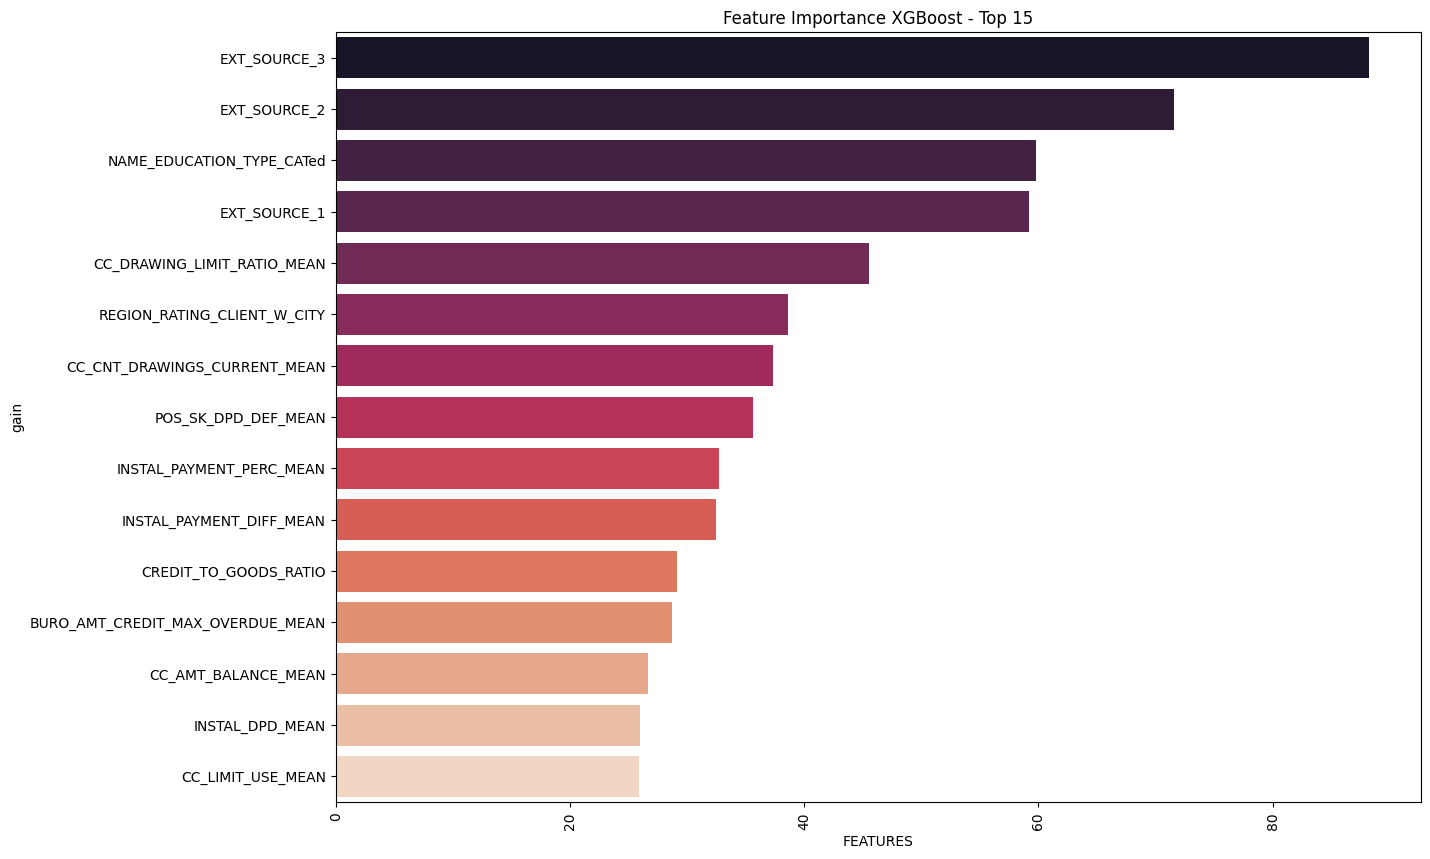

In [9]:
feat_imps = feature_importance_XGBoost(xgb_estimator=xgb_estim, feature_names=X_train.columns, importance_type='gain')

In [10]:
# !pip install graphviz #Installer mglearn depuis Jupyter

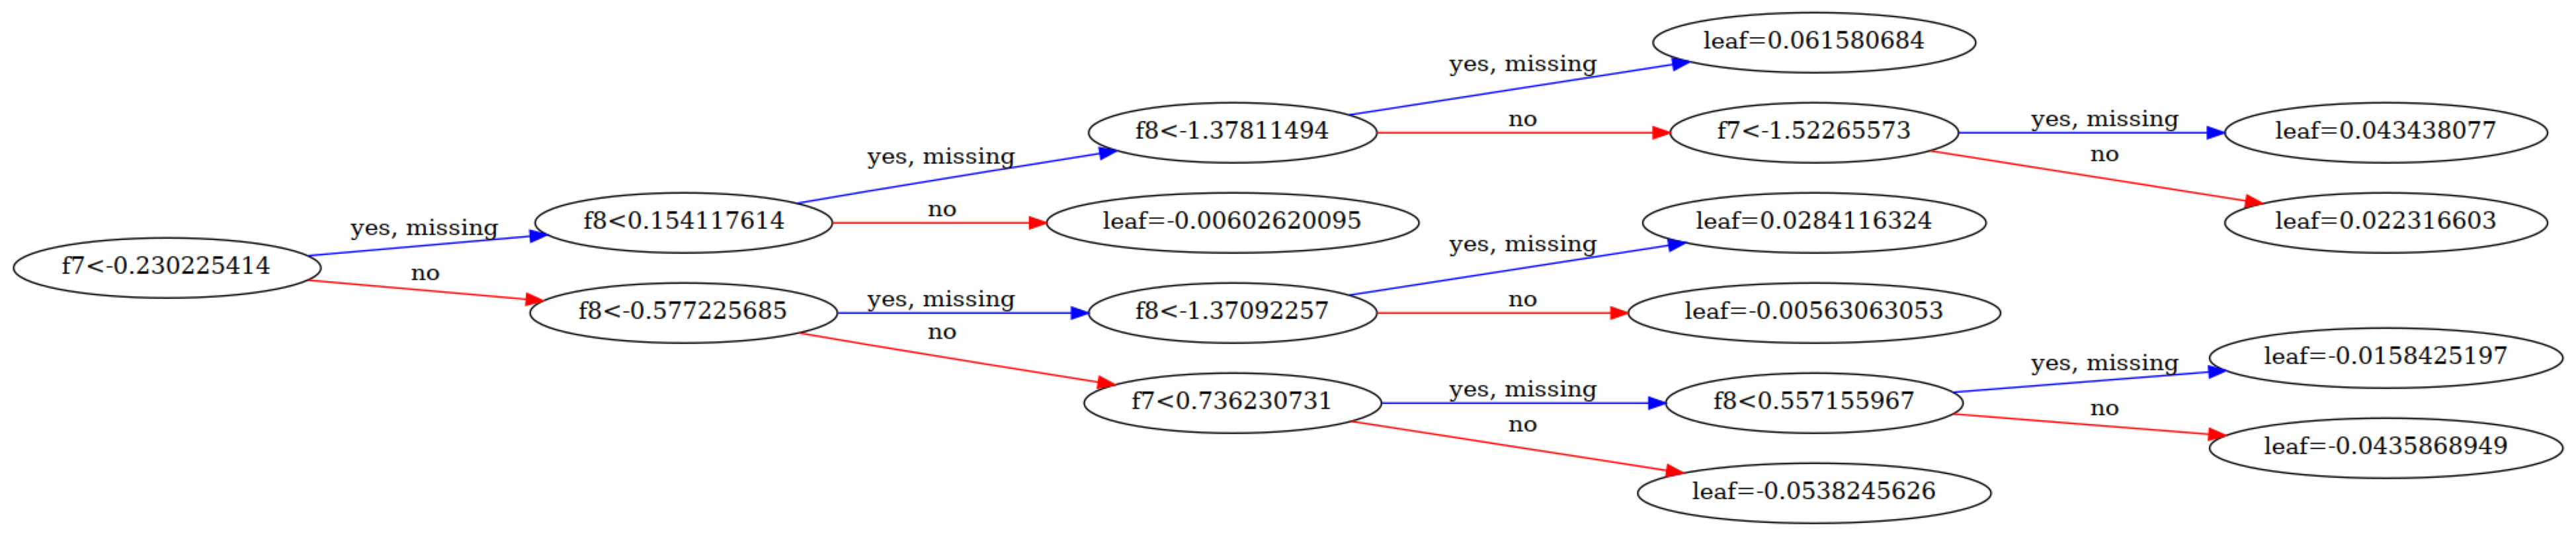

In [11]:
import xgboost as xgb

xgb.plot_tree(xgb_estim, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(50,50)

In [12]:
feat_imps[feat_imps['feature_name'].isin(['EXT_SOURCE_2', 'EXT_SOURCE_3'])]

,feature_number,gain,feature_name
0,f8,88.229919,EXT_SOURCE_3
1,f7,71.578690,EXT_SOURCE_2


# LOCAL ANALYSIS

In [13]:
import shap

/home/maximorose/anaconda3/envs/oc_ds_p7/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/maximorose/anaconda3/envs/oc_ds_p7/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def

In [14]:
# print the JS visualization code to the notebook
shap.initjs()

Attention, impossible d'utiliser SHAP avec la derniere version de numpy.

Tentative de downgrade de numpy, en esperant que ca ne pete pas tout :
conda install -c conda-forge numpy=1.23.0 -n oc_ds_p7

cf. [ici](https://github.com/WongKinYiu/yolov7/issues/1280)

In [16]:
# # this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
# explainer = shap.TreeExplainer(loaded_model['estimator'])
# shap_values = explainer.shap_values(X)

In [17]:
from xgboost import DMatrix

In [18]:
X_t = transform_X(X_train, loaded_model=loaded_model)

In [19]:
# This is what you need
booster = loaded_model['estimator'].get_booster()
predictions = booster.predict(DMatrix(X_t), pred_contribs=True)

In [20]:
print(predictions.shape)

(175724, 52)


In [21]:
X_train.shape

(175724, 51)

In [33]:
df_pred_shap = pd.DataFrame(predictions)
no_bias = df_pred_shap.drop(columns=[51])
no_bias.columns = X.columns
no_bias

,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CREDIT_TO_ANNUITY_RATIO,...,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_COUNT,CC_MONTHS_BALANCE_MEAN,CC_AMT_BALANCE_MEAN,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_LIMIT_USE_MEAN,CC_LATE_PAYMENT_MEAN,CC_DRAWING_LIMIT_RATIO_MEAN
0,0.029220,0.013926,0.044717,0.048125,-0.199011,-0.017303,-0.007465,-0.464852,0.128893,0.097408,...,-0.032255,-0.060339,-0.030780,0.041699,0.002195,-0.065262,-0.053773,-0.082750,0.0,-0.022963
1,0.101289,-0.024984,0.008293,0.051705,0.003374,0.023559,-0.525080,0.434730,-0.047862,-0.089798,...,-0.032243,0.127174,0.029494,0.110851,0.002594,0.001945,-0.012641,0.006662,0.0,-0.018478
2,0.029666,0.016284,-0.026038,0.029711,0.006947,-0.082458,-0.463800,0.367183,0.722001,-0.124606,...,-0.019164,-0.032179,-0.013058,0.013942,0.002090,0.002903,-0.012239,0.007425,0.0,-0.017233
3,0.065368,-0.109536,-0.029418,0.013419,-0.219158,0.062749,-0.160306,-0.383759,0.092847,0.084278,...,-0.037232,0.009648,-0.076700,0.051860,0.001904,0.002469,-0.016892,0.005399,0.0,-0.021312
4,0.087195,-0.036997,-0.037315,0.036685,0.002367,-0.003627,-0.525997,-0.248682,-0.404961,-0.137144,...,-0.032437,0.118147,0.008501,0.068559,0.002209,0.002030,-0.014612,0.005483,0.0,-0.019280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175719,0.091281,-0.036585,-0.008569,0.033828,0.120292,-0.028830,0.023241,0.337067,-0.235288,0.120825,...,-0.035910,-0.065033,0.029115,0.086872,0.002595,-0.000041,-0.012224,0.007165,0.0,-0.019981
175720,-0.004793,-0.028450,-0.021485,0.046926,0.099947,0.041687,0.026693,0.066902,-0.476260,-0.090287,...,0.044998,0.001775,0.024329,-0.147661,-0.011656,0.044478,0.170116,0.016794,0.0,0.156495
175721,0.099315,-0.134690,0.058021,0.046849,0.003899,-0.076858,0.036688,0.011334,-0.046230,0.179989,...,0.043114,-0.053500,0.056607,-0.075792,-0.014693,0.048698,0.117616,0.016362,0.0,0.122574
175722,0.030550,0.092137,0.038165,0.031257,0.002620,-0.093344,-0.505010,-0.515692,0.069670,0.074457,...,0.066139,-0.045939,0.035336,-0.046730,0.002670,0.001048,-0.017226,0.008355,0.0,-0.021149


In [35]:
mon_gars = no_bias.iloc[0, :]
shapval_for_unique = mon_gars.T.reset_index()
shapval_for_unique.columns = ['feature', 'shap_force']

In [36]:
shapval_for_unique

,feature,shap_force
0,AMT_ANNUITY,0.029220
1,DAYS_BIRTH,0.013926
2,DAYS_EMPLOYED,0.044717
3,DAYS_ID_PUBLISH,0.048125
4,REGION_RATING_CLIENT_W_CITY,-0.199011
5,HOUR_APPR_PROCESS_START,-0.017303
6,EXT_SOURCE_1,-0.007465
7,EXT_SOURCE_2,-0.464852
8,EXT_SOURCE_3,0.128893
9,CREDIT_TO_ANNUITY_RATIO,0.097408


In [37]:
shapval_for_unique['feature'].values.tolist()

['AMT_ANNUITY',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'CREDIT_TO_ANNUITY_RATIO',
 'CREDIT_TO_GOODS_RATIO',
 'ANNUITY_TO_INCOME_RATIO',
 'INCOME_TO_EMPLOYED_RATIO',
 'INCOME_TO_BIRTH_RATIO',
 'NAME_EDUCATION_TYPE_CATed',
 'BURO_DAYS_CREDIT_MEAN',
 'BURO_CREDIT_ENDDATE_MAX',
 'BURO_AMT_CREDIT_MAX_OVERDUE_MEAN',
 'BURO_AMT_CREDIT_SUM_LIMIT_MEAN',
 'BURO_DEBT_PERCENTAGE_MEAN',
 'BURO_HAS_CREDIT_SUM',
 'BURO_HAS_CLOSED_SUM',
 'BURO_HAS_DELAYED_BADDEBT_MEAN',
 'PREV_CREDIT_TO_ANNUITY_RATIO_MEAN',
 'PREV_SIMPLE_INTERESTS_MEAN',
 'PREV_DOWN_PAYMENT_TO_CREDIT_MEAN',
 'PREV_DAYS_LAST_DUE_DIFF_MEAN',
 'PREV_YIELD_GROUP_HIGH_SUM',
 'PREV_HAS_REFUSED_SUM',
 'PREV_HAD_LATE_PAYMENTS_MEAN',
 'ACTIVE_REMAINING_DEBT_SUM',
 'ACTIVE_AMT_INSTALMENT_SUM',
 'REFUSED_APP_CREDIT_PERC_MEAN',
 'APPROVED_AMT_DOWN_PAYMENT_SUM',
 'REFUSED_DAYS_DECISION_MEAN',
 'POS_SK_DPD_MEAN',
 'POS_SK_DP

In [38]:
X.dtypes

AMT_ANNUITY                          float32
DAYS_BIRTH                           float16
DAYS_EMPLOYED                        float16
DAYS_ID_PUBLISH                      float16
REGION_RATING_CLIENT_W_CITY          float16
HOUR_APPR_PROCESS_START              float16
EXT_SOURCE_1                         float16
EXT_SOURCE_2                         float16
EXT_SOURCE_3                         float16
CREDIT_TO_ANNUITY_RATIO              float16
CREDIT_TO_GOODS_RATIO                float16
ANNUITY_TO_INCOME_RATIO              float16
INCOME_TO_EMPLOYED_RATIO             float32
INCOME_TO_BIRTH_RATIO                float16
NAME_EDUCATION_TYPE_CATed            float16
BURO_DAYS_CREDIT_MEAN                float16
BURO_CREDIT_ENDDATE_MAX              float16
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN     float32
BURO_AMT_CREDIT_SUM_LIMIT_MEAN       float32
BURO_DEBT_PERCENTAGE_MEAN            float32
BURO_HAS_CREDIT_SUM                  float16
BURO_HAS_CLOSED_SUM                  float16
BURO_HAS_D